In [433]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [434]:
#dataframe = pd.read_csv(r"TipoPalabra_conteos_mean_umbral_mean.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.7.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.8.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAs.csv")
dataframe = pd.read_csv(r"salida/TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAspromedio2.csv")
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,faltan,faltan2,CLASS
0,2.358561,0.323334,0.622311,0.000000,0.000000,0.000000,0.000000,0.000000,2.588061,0.833760,...,0,0,0,0,3,2,0.754248,0.272841,0,entailment
1,4.879904,0.944648,0.452539,0.000000,2.080487,1.739786,0.000000,0.000000,2.459331,0.451001,...,0,0,4,0,0,1,0.877673,0.159916,1,entailment
2,2.305079,0.928263,0.942276,0.000000,1.355766,0.440236,0.173587,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0.859763,0.256307,1,contradiction
3,1.433082,0.000000,2.508721,0.000000,0.771747,0.000000,0.949051,0.000000,2.069529,0.000000,...,0,0,2,0,0,0,0.925000,1.000000,1,contradiction
4,2.326802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2,0,2,0,0,0,0.948718,0.098130,1,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.413959,0.825655,0.386321,1.365551,1.448315,1.008830,0.343587,0.000000,1.097808,0.287286,...,0,0,1,0,1,2,0.825581,0.110635,1,entailment
96,2.000000,0.000000,0.000000,0.000000,0.768382,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,3,0,0,0,1.000000,0.652412,0,entailment
97,1.065250,0.000000,0.254503,0.000000,0.000000,0.000000,0.000000,0.000000,0.752330,0.000000,...,0,0,0,0,0,0,0.681115,0.467361,2,contradiction
98,1.316973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.661479,0.000000,...,0,0,2,0,0,0,1.000000,1.000000,2,contradiction


In [435]:
#dataframe.corr()

In [436]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,faltan,faltan2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.298224,0.454706,0.901464,0.148235,0.858387,0.403246,0.356483,0.074768,1.002412,0.163880,...,0.120000,0.190000,0.070000,2.180000,0.030000,0.320000,0.370000,0.880817,0.425088,1.240000
std,2.190854,0.883885,0.909427,0.384945,1.317747,0.832110,0.591267,0.290324,1.471056,0.364595,...,0.477367,0.662029,0.536637,1.585158,0.171447,0.566399,0.676518,0.134301,0.368286,1.231899
min,0.000000,0.000000,0.000000,0.000000,-0.008496,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.058745,0.000000
25%,1.997307,0.000000,0.321252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.851316,0.140080,0.000000
50%,2.644824,0.000000,0.649265,0.000000,0.417869,0.000000,0.000000,0.000000,0.660955,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.909091,0.273321,1.000000
75%,3.989543,0.442800,1.293300,0.000000,1.093820,0.466835,0.462931,0.000000,1.234545,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,0.961497,0.778200,2.000000
max,11.643143,4.508710,4.385522,2.191570,6.881524,3.908348,3.463590,1.872087,12.134146,2.184639,...,3.000000,4.000000,5.000000,7.000000,1.000000,3.000000,3.000000,1.000000,1.000000,5.000000


In [437]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


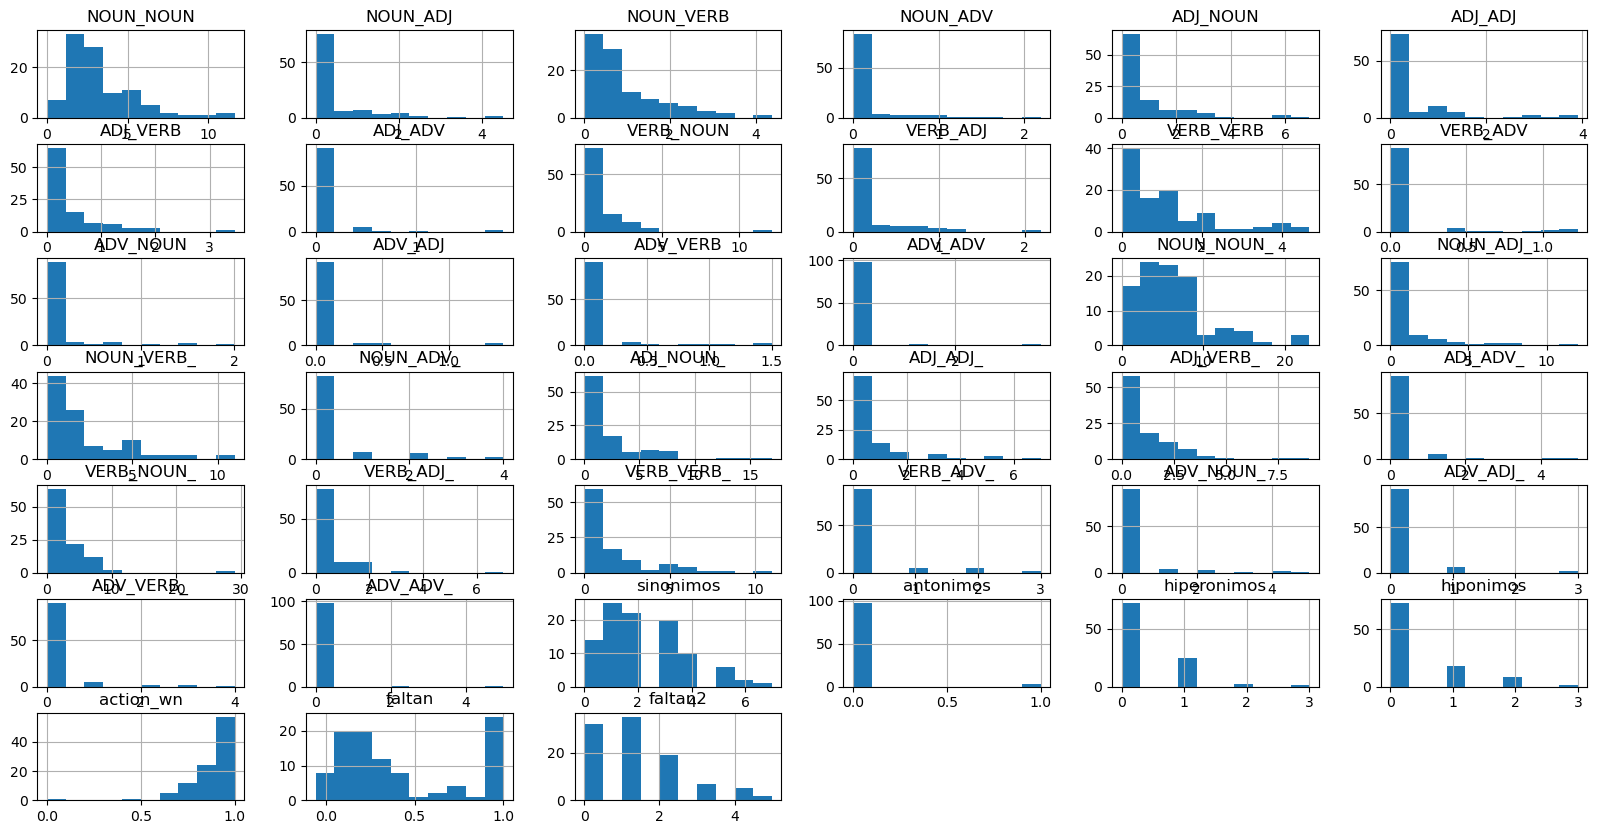

In [438]:
dataframe.hist(figsize=(20,10))
plt.show()

In [439]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [440]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [441]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

(100, 39)

In [442]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [443]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [444]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [445]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [446]:
model.decision_function(X)

array([[ 2.27211171e-01,  5.26708781e-01, -7.53919953e-01],
       [-9.03247596e-01,  4.41143208e-01,  4.62104388e-01],
       [-1.09788310e-01, -6.24149591e-01,  7.33937902e-01],
       [ 5.68651685e-01,  6.09029977e-01, -1.17768166e+00],
       [-6.85779961e-01, -9.53268398e-03,  6.95312645e-01],
       [ 7.27904887e-02, -5.68548272e-01,  4.95757783e-01],
       [-6.16001934e-01,  6.82739514e-01, -6.67375794e-02],
       [-7.11984629e-01,  1.40963330e+00, -6.97648675e-01],
       [-2.97081567e-01, -2.70070763e-01,  5.67152330e-01],
       [-1.09404733e+00,  1.73752535e+00, -6.43478021e-01],
       [-8.29705028e-01,  5.90938390e-01,  2.38766638e-01],
       [ 5.50035478e-01, -5.70355088e-01,  2.03196106e-02],
       [-3.55226705e-01,  6.37476623e-01, -2.82249918e-01],
       [ 2.97133189e-01, -5.07235656e-01,  2.10102466e-01],
       [-2.94044054e-01, -7.16180244e-01,  1.01022430e+00],
       [-6.65837710e-01,  1.01097453e+00, -3.45136815e-01],
       [-5.82375166e-01,  2.16197724e+00

In [447]:
labels=dataframe.columns[1:]

In [448]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [449]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [450]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  27 ADV_NOUN_ 32 antonimos
Entailment  22 ADJ_ADV_ 38 CLASS
Neutral  30 ADV_ADV_ 37 faltan2


In [451]:
n_columns=dataframe.shape[1]-1

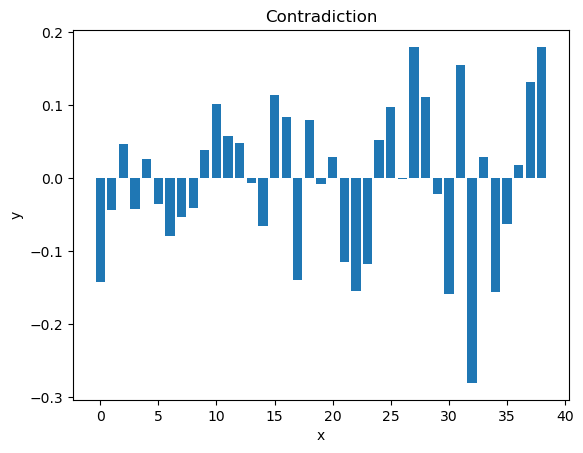

In [452]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

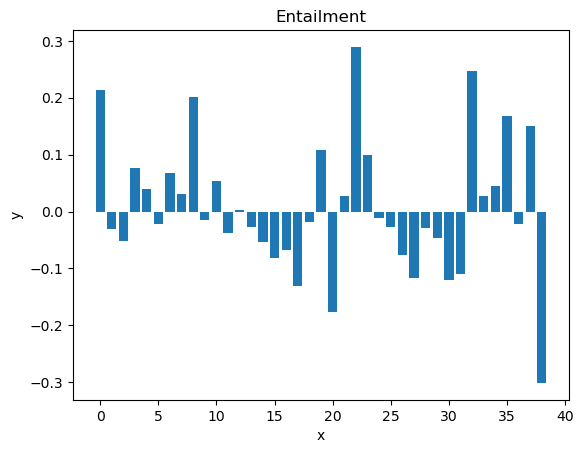

In [453]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

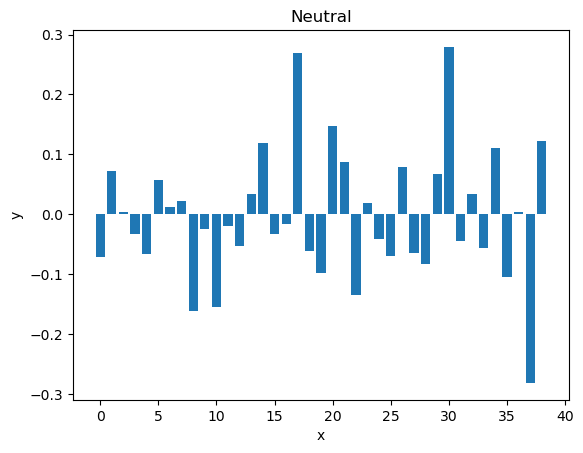

In [454]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [455]:
predictions = model.predict(X)
print(predictions)

['entailment' 'neutral' 'neutral' 'entailment' 'neutral' 'neutral'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'contradiction' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'contradiction' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'contradiction' 'neutral'
 'contradiction' 'contradiction' 'contradiction' 'contradiction' 'neutral'
 'entailment' 'contradiction' 'neutral' 'entailment' 'neutral'
 'entailment' 'contradiction' 'contradiction' 'entailment' 'entailment'
 'contradiction' 'entailment' 'contradiction' 'neutral' 'entailment'
 'entailment' 'contradiction' 'contradiction' 'entailment' 'entailment'
 'entailment' 'contradiction' 'neutral' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'contradiction' 'entailment'
 'entailment' 'contradiction' 'contradiction' 'neutral' 'ent

In [456]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [457]:
X

array([[2.35856125, 0.32333449, 0.62231126, ..., 0.75424837, 0.27284071,
        0.        ],
       [4.87990382, 0.9446483 , 0.452539  , ..., 0.87767335, 0.15991646,
        1.        ],
       [2.30507916, 0.92826316, 0.94227566, ..., 0.85976331, 0.2563073 ,
        1.        ],
       ...,
       [1.06525022, 0.        , 0.25450292, ..., 0.68111455, 0.46736127,
        2.        ],
       [1.316973  , 0.        , 0.        , ..., 1.        , 1.        ,
        2.        ],
       [2.04060631, 0.        , 0.68808261, ..., 0.86315789, 0.02713922,
        2.        ]])

In [458]:
model.score(X,y)

0.72

In [459]:
print(confusion_matrix(y, predictions))

[[17  8  2]
 [ 3 38  1]
 [ 6  8 17]]


In [460]:
print(f1_score(y,predictions, average=None))

[0.64150943 0.79166667 0.66666667]


In [461]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [462]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.475000 (0.261008)


In [463]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.65


In [464]:
print(confusion_matrix(Y_validation, predictions))

[[3 1 0]
 [2 7 0]
 [2 2 3]]


In [465]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.43      0.75      0.55         4
   entailment       0.70      0.78      0.74         9
      neutral       1.00      0.43      0.60         7

     accuracy                           0.65        20
    macro avg       0.71      0.65      0.63        20
 weighted avg       0.75      0.65      0.65        20



In [466]:
#X_new = pd.DataFrame()
#model.predict(X_new)